In [ ]:
import nltk
nltk.download()

In [1]:
from os import listdir
import nltk
path = '/Volumes/Intreview Transcriptions/text_for_transcribing/'
#This text is private, so is mounted via a password-protected disk image.

In [2]:
# encoding=utf8  
import sys  

#reload(sys)  
#sys.setdefaultencoding('utf8')
#print sys.getdefaultencoding()

In [3]:
#remove .ds_store
files = listdir(path)
files.pop(0)
files

['AWR.txt',
 'BHR.txt',
 'DUR.txt',
 'ELR.txt',
 'EWR.txt',
 'EZR.txt',
 'GIR.txt',
 'JCR.txt',
 'LUR.txt',
 'MFR.txt',
 'NVR.txt',
 'PAR.txt',
 'RUR.txt',
 'STR.txt',
 'TBR.txt']

In [4]:
#test with a single file
with open(path+'NVR.txt') as file:
    data = file.read().decode('utf-8')
#print data
type(data)

unicode

In [5]:
import pandas as pd
text = pd.DataFrame(columns = ['ID', 'Interviewer', 'Respondent', 'All Text'])

In [6]:
def splitInterview (str):
    #this splits an interview into interviewee and interviewer
    
    #tokenize to sentences, creating a list of sentence strings
    sentences = nltk.sent_tokenize(str)
    #print len(sentences)
    
    interviewer = []
    response = []
    #switch between Interviewer (I) and Respondent (other)
    
    responseFlag = False
    for sentence in sentences:
        #print sentence
        
        if 'R:' in sentence:
            responseFlag = True
            ident, sentence = sentence.split('R:',1)
        if 'I:' in sentence:
            responseFlag = False
            ident, sentence = sentence.split('I:',1)
        
        #print responseFlag
        
        if responseFlag:
            response.append(sentence)
        else:
            interviewer.append(sentence)
        
    #print response
        
    return [interviewer, response]

In [7]:
split = splitInterview(data)
row = pd.DataFrame(['NVR', split[0], split[1], data]).transpose()
row.columns = text.columns.values
row.set_index('ID')
text.append(row)
text.head()
#print split[1]
#for sent in split[1]:
    #print sent

,ID,Interviewer,Respondent,All Text


In [8]:
text = pd.DataFrame(columns = ['ID', 'Interviewer', 'Respondent', 'All Text'])
#text.set_index('ID')
text.head()

,ID,Interviewer,Respondent,All Text


In [9]:
for filename in files:
    with open(path+filename) as file:
        data = file.read().decode('utf-8')
    split = splitInterview(data)
    row = pd.DataFrame([filename, split[0], split[1], data]).transpose()
    row.columns = text.columns.values
    #row.set_index('ID')
    text = text.append(row)
text.reset_index()
text.head()


,ID,Interviewer,Respondent,All Text
0,AWR.txt,"[\tRight then, [REDACTED], thank you very much...","[\tYeah, I do [laughs]., \tWell, a lot of arti...","I:\tRight then, [REDACTED], thank you very muc..."
0,BHR.txt,"[\tOkay this is an interview with BH., Hello B...","[\tIt happens to a degree., It does actually y...",I:\tOkay this is an interview with BH. Hello ...
0,DUR.txt,[\tIt’s kind of a bit like proof that it’s [un...,"[\tDo you want to test that it’s picking up?, ...",I:\tIt’s kind of a bit like proof that it’s [u...
0,ELR.txt,"[\tOkay, I’ll explain what I’m working, it’s t...","[\t[Unclear 0:00:14] UCL., \tYes, definitely.,...","I:\tOkay, I’ll explain what I’m working, it’s ..."
0,EWR.txt,"[\tOkay we’re recording., So EW, thank you ver...","[\tSo I can share my knowledge., \tAbsolutely....","I:\tOkay we’re recording. So EW, thank you ve..."


In [10]:
 text.to_csv('data/interviews.csv' ,  index = False, encoding = 'utf-8')

In [11]:
#combine all cells into one block of text and word-tokenise
all_response = ''
for cell in text['Respondent']:
    for sentence in cell:
        all_response = all_response + sentence
word_response = nltk.word_tokenize(all_response)
len(word_response)

51000

In [12]:
fdist1 = nltk.FreqDist(word_response)

In [13]:
tagged_r = nltk.pos_tag(word_response)

In [14]:
permitted_tags = set([
    'NN',
    'NNS'
])

In [15]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline  

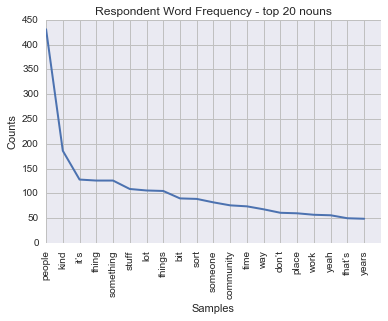

In [16]:
fd = nltk.FreqDist()

for bit in tagged_r:
    if bit[1] in permitted_tags and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1
        
plot1 = fd.plot(20, title = 'Respondent Word Frequency - top 20 nouns')

In [20]:
#KWIC modelling
import RAKE.RAKE as rake

In [54]:
rake_object = rake.Rake("data/SmartStoplist.txt")

In [55]:
keywords = rake_object.run(all_response)

In [56]:
keywords[:10]

[(u'michael sydney moore borrowing white spirit', 20.113636363636363),
 (u'circular tables create triangular edges', 19.314285714285713),
 (u'similar facebook group called festival pixies', 17.753823953823954),
 (u'started noticing west london types sort', 16.155513784461153),
 (u'hackney wick fish island facebook page', 15.461581733340712),
 (u'star wars dvd box set', 15.343333333333334),
 (u'hackney wick fish island facebook group', 14.3504706222296),
 (u'hackney wick fish island page', 13.325218096977075),
 (u'semi political policy drive', 12.166666666666666),
 (u'big essex contingency coming', 12.005813953488373)]

In [41]:
response_text = nltk.Text(word_response)

In [42]:
keywords[0][0]

u'michael sydney moore borrowing white spirit'

In [47]:
response_text.concordance('creativity')

Displaying 3 of 3 matches:
h , we do.It’s about sharing that creativity too . Always , always , I always 
do and that takes all the fun and creativity out of the creative economy.So yo
the new stories , where’s all the creativity ? Where’s all the modern journali


In [44]:
response_text.concordance(keywords[0][0])

No matches
